<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/main/notebooks/Introduction_to_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to GeoPandas

This quick tutorial introduces the key concepts and basic features of GeoPandas.

## Concepts

GeoPandas, as the name suggests, extends the popular data science library [pandas](https://pandas.pydata.org) by adding support for geospatial data. [If you are not familiar with `pandas`, you can take a quick look at its [Getting started documentation](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) before proceeding.]

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, that can store geometry columns and perform spatial operations. Therefore, your `GeoDataFrame` is a combination of traditional data (numerical, boolean, text etc.), and a column with geometries (points, polygons etc.).

![geodataframe schema](https://raw.githubusercontent.com/geopandas/geopandas/8279cc33bf46dcf23bbe8cf92179951e673bea68/doc/source/_static/dataframe.svg)

Each `GeoDataFrame` can contain any geometry type and has a `crs` attribute, which stores information about the projection (CRS stands for Coordinate Reference System).

`geopandas` also provides simple visualization capacity that you can make a quick map.

Now let's see how to use `geopandas` with some real data.


In [1]:
import geopandas

### Reading files

`geopandas` can read in popular GIS data files including shapefiles, GeoJSON, GeoPackage, etc. You can read it using `geopandas.read_file()` function, which automatically detects the filetype and creates a GeoDataFrame.

So here I put some files in our course Github repository:

That you can fetch directly from an URL.

In [2]:
earthquakes = geopandas.read_file("https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/earthquake_2.5_month.geojson")

A quick view of the data can be down by using the `.plot()` function to your `GeoDataFrame`.

<Axes: >

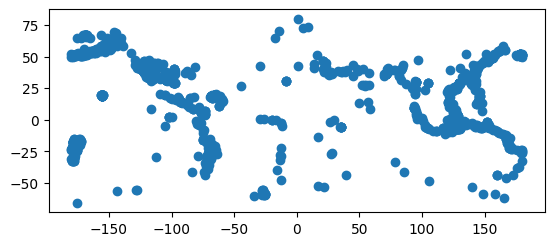

In [3]:
earthquakes.plot()

Download a world country shapefile from [here](https://hub.arcgis.com/datasets/esri::world-countries-generalized/explore?location=-0.755783%2C0.000000%2C2.03).

Note that each shapefile is a FOLDER with at least:
1. `xxx.shp` This is the file contains the geometries.
2. `xxx.dbf` This is the file contains the normal data.
3. `xxx.shx` This is the file contains spatial index of the data.
4. `xxx.prj` This is the file contains the projection info.

There might be some other files, e.g., `xxx.cpg`, `xxx.sbn` or `xxx.sbx`, which contain some additional information sucha as metadata, but they are often not required.

**IMPORTANT**: When transfering a shapefile, you need to transfer the entire folder.

Upload your data to your google drive. I would recommand you create a folder named **"GIS4162"** then have sub folder called **"data"**, then upload the shapefile(s) there.

Next mount your google drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copy the path to your shapefile folder and paste it inside of `geopandas.read_file("")`

In [5]:
countries = geopandas.read_file("/content/drive/MyDrive/GIS4162/data/World_Countries_Generalized")

<Axes: >

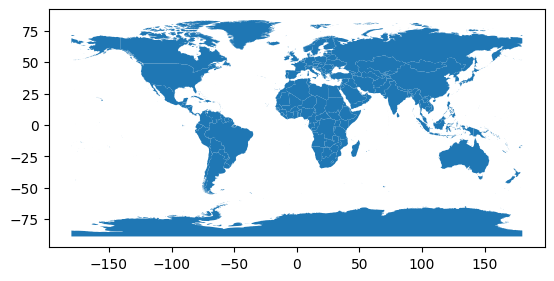

In [6]:
countries.plot()

In [7]:
countries

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."
...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ..."
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137..."
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13..."
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096..."


### Writing files

To write a `GeoDataFrame` back to file use `GeoDataFrame.to_file()`. The default file format is Shapefile, but you can specify your own with the `driver` keyword. Here lets convert the format of the countries shapefile to a GeoJSON back to your google drive.

In [8]:
countries.to_file("/content/drive/MyDrive/GIS4162/data/countries.geojson", driver="GeoJSON")

## Simple accessors and methods

Now we have our `GeoDataFrame` and can start working with its geometry.

### Measuring area

To measure the area of each polygon (or MultiPolygon in this specific case), access the `GeoDataFrame.area` attribute, which returns a column which called a `Series`.

But first, to make the results easier to read, set the names of the boroughs as the index:

In [9]:
countries.area

<ipython-input-9-9a68f0d57fd2>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.area


0       62.566714
1        3.073540
2      213.513461
3        0.013720
4        0.055585
          ...    
246     27.556082
247      0.013414
248     38.289871
249     62.814022
250     33.463130
Length: 251, dtype: float64

You can also create a new column in the `GeoDataFrame` called `area` to store the calculated area.

In [10]:
countries["area"] = countries.area
countries

<ipython-input-10-aa8d697239cf>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries["area"] = countries.area


,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,area
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",62.566714
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569...",3.073540
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...",213.513461
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14...",0.013720
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...",0.055585
...,...,...,...,...,...,...,...,...,...
246,247,Vietnam,VN,Viet Nam,VN,66.866802,27.556082,"MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...",27.556082
247,248,Wallis and Futuna,WF,France,FR,0.700608,0.013414,"MULTIPOLYGON (((-178.06082 -14.32389, -178.137...",0.013414
248,249,Yemen,YE,Yemen,YE,34.011327,38.289871,"MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...",38.289871
249,250,Zambia,ZM,Zambia,ZM,49.141439,62.814022,"POLYGON ((30.21302 -14.98172, 30.21916 -15.096...",62.814022


Let's find out which country has the largest/smallest area? Have a guess before running the command?

In [11]:
countries.sort_values('area', ascending=False)[['COUNTRY','area']]

,COUNTRY,area
7,Antarctica,5672.928286
184,Russian Federation,2931.526082
41,Canada,1694.025240
238,United States,1116.670604
47,China,953.844048
...,...,...
87,Gibraltar,0.000786
226,Tokelau,0.000606
116,Juan De Nova Island,0.000487
88,Glorioso Islands,0.000407


### Getting polygon boundary and centroid

To get the boundary of each polygon (LineString), access the `GeoDataFrame.boundary`:

<Axes: >

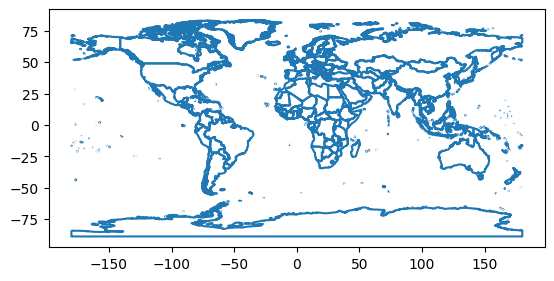

In [12]:
countries.boundary.plot()


Similarly we can get centroids from the country polygons.

<ipython-input-13-178ce31dfc6b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.centroid.plot()


<Axes: >

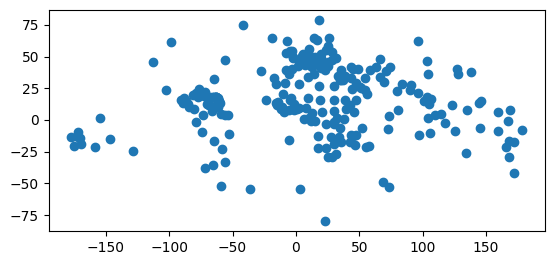

In [13]:
countries.centroid.plot()

Or create a circle buffer of each centroid using `.buffer`.

<ipython-input-14-9a5d457e60ed>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.centroid.buffer(10).plot()
<ipython-input-14-9a5d457e60ed>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.centroid.buffer(10).plot()


<Axes: >

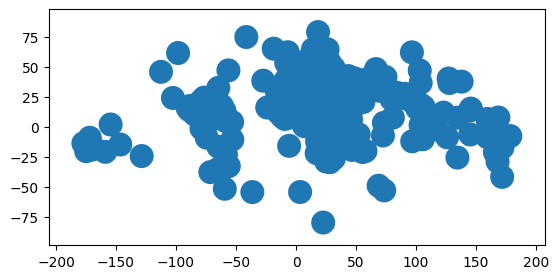

In [14]:
countries.centroid.buffer(10).plot()

## Making maps

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call `GeoDataFrame.plot()`. To color code by another column, pass in that column as the first argument. In the example below, we plot the active geometry column and color code by the `"area"` column. We also want to show a legend (`legend=True`).

<Axes: >

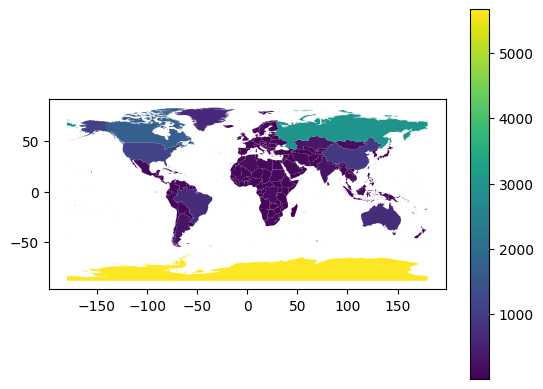

In [15]:
countries.plot("area", legend=True)

More often we need to overlay multiple layers on top of each other. Here we need to put them on the same `axis`.

First, create the first layer and named it as `ax`. Then plot the second layer, and within the `plot()` function, write down `ax=ax`.

You can also set some level of transparency by including `alpha=0.5` in the plot function.

<ipython-input-16-d4b499e56685>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.centroid.buffer(10).plot(ax=ax)
<ipython-input-16-d4b499e56685>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.centroid.buffer(10).plot(ax=ax)


<Axes: >

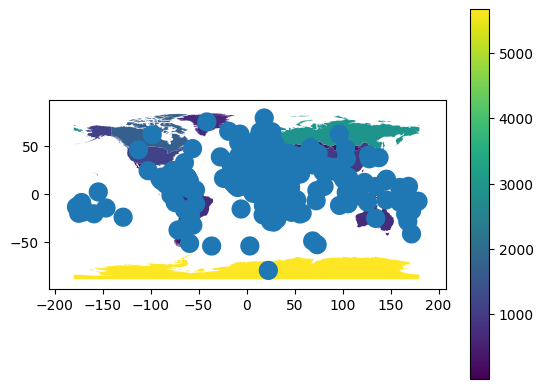

In [16]:
ax = countries.plot("area", legend=True)

countries.centroid.buffer(10).plot(ax=ax)

## Geometric relationships
The most commonly used operation is called spatial join:

- `GeoDataFrame.sjoin`

A spatial join can merge two `GeoDataFrame`s, one left, one right based on a `predicate`. The predicate can be, for example, `within`,`intersects`, `contains`, etc., for different operations.

![spatial join schema](https://datavisdotblog.files.wordpress.com/2022/01/spatial-joins-header.png?w=1204)



The results of the spatial join will be a new `GeoDataFrame` with all information from both the `GeoDataFrame` tables that meet the speficied `predicate` condition.

Here, if the interest is to count how many earthquakes each country has, then we will be joining the country GeoDataFrame with the earthquakes GeoDataFrame with `predicate="contains"`.

This is actually a quite complex step, so I write a helper function `count_points_in_polygon` that takes three parameters:
- the polygons GeoDataFrame,
- the points GeoDataFrame, and
- the textID name in the polygon GeoDataFrame. Here the id used is "COUNTRY".

The function will return a list of countries with # of earthquakes as a seperate column.

In [17]:
def count_points_in_polygon(polygons, points, id):
  return polygons.sjoin(points, predicate="contains").groupby(id).size().rename("n_points")

In [18]:
results = count_points_in_polygon(countries, earthquakes,"COUNTRY")
results

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2177: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4979

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


COUNTRY
Afghanistan            13
Albania                 1
Angola                  1
Argentina              17
Azerbaijan              2
Bangladesh              1
Bolivia                 4
Bulgaria                1
Canada                  3
Chile                  23
China                  24
Colombia               12
Congo DRC               1
Costa Rica              3
Ecuador                 6
Guatemala               1
Hungary                 4
Iceland                 1
India                   2
Indonesia              14
Iran                    5
Iraq                    1
Japan                   7
Mexico                 16
Mongolia                1
Morocco                 4
Myanmar                 3
New Zealand             2
Papua New Guinea       12
Peru                    8
Philippines             4
Poland                  1
Puerto Rico            48
Romania                 1
Russian Federation      6
Solomon Islands         1
South Africa            2
Spain                   1
Taji

Then we can join it back to the original GeoDataFrame using common country name, then make a map of it.

<Axes: >

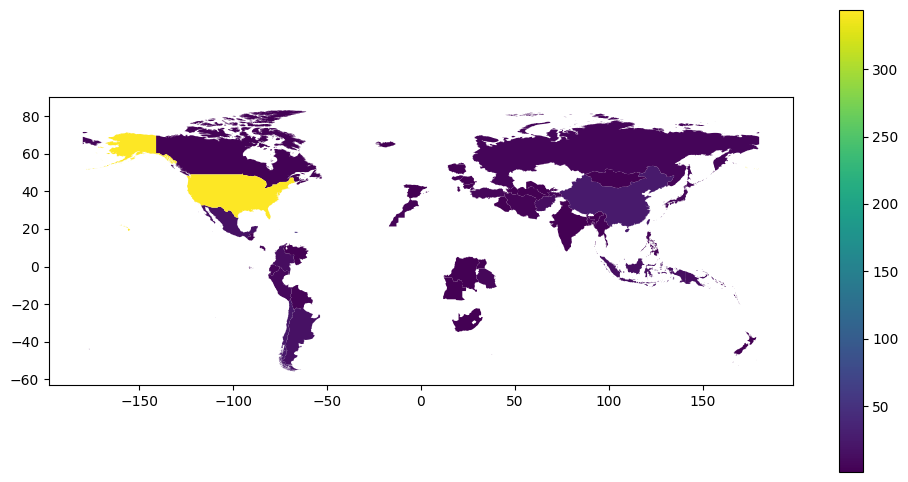

In [19]:
countries.join(results,how='left',on="COUNTRY").plot("n_points", legend=True,figsize=(12,6))

## What next?

With GeoPandas we can do much more than what has been introduced so far, from [aggregations](../docs/user_guide/aggregation_with_dissolve.rst), to [spatial joins](../docs/user_guide/mergingdata.rst), to [geocoding](../docs/user_guide/geocoding.rst), and [much more](../gallery/index.rst).

Head over to the [user guide](../docs/user_guide.rst) to learn more about the different features of GeoPandas, the [Examples](../gallery/index.rst) to see how they can be used, or to the [API reference](../docs/reference.rst) for the details.